In [8]:
from qcodes_contrib_drivers.drivers.Thorlabs.APT import Thorlabs_APT
import numpy as np
import matplotlib.pyplot as plt
from seabreeze.spectrometers import list_devices, Spectrometer
import time

apt = Thorlabs_APT()

In [2]:
from qcodes_contrib_drivers.drivers.Thorlabs.K10CR1 import Thorlabs_K10CR1

inst = Thorlabs_K10CR1("K10CR1", 0, apt)

Connected to: Thorlabs K10CR1 (serial:55357574, firmware:SW Version 1.0.3) in 0.00s


In [3]:
devices = list_devices()
if devices:
    print("Available devices:", devices)
else:
    print("No devices available.")

Available devices: [<SeaBreezeDevice HR4000:HR4C222>]


In [4]:
# Move to zero and recalibrate
inst.move_home()

# Read position
print("Position:", inst.position())

Position: 0.0


In [5]:
spec = Spectrometer(devices[0])
spec.integration_time_micros(1e5)

# Without Accumulation.

In [7]:
# Set target velocity to 10 deg/s
inst.velocity_max(10)

# Move to specific angle and wait until it's finished
inst.position(155)
# Read position
print("Position:", inst.position())
time.sleep(0.5)
#careful the backlash from the motor, need settling tim

fig = plt.figure()
ax = fig.add_subplot(111)
wavelengths = spec.wavelengths()
print(wavelengths)
intensities= spec.intensities()
print(intensities)
ax.plot(wavelengths,intensities)

# Label the x and y axes
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity (nm)')
time.sleep(1.0)

Position: 155.0


NameError: name 'time' is not defined

# With Accumulation

Position: 155.0


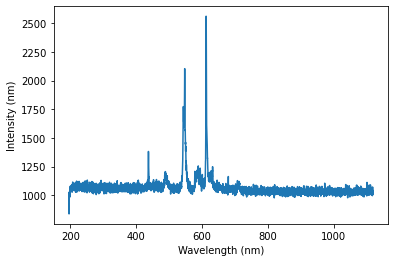

In [30]:
# Set target velocity to 10 deg/s
inst.velocity_max(10)

# Move to specific angle and wait until it's finished
inst.position(155)
# Read position
print("Position:", inst.position())
time.sleep(0.5)
#careful the backlash from the motor, need settling tim

fig = plt.figure()
ax = fig.add_subplot(111)

# Define the number of accumulations
num_accumulations = 5  

# Initialize lists to store wavelengths and intensities
wavelengths = []
intensity_sum = np.zeros(len(spec.wavelengths()))  # Initialize intensity_sum with zeros

# Perform accumulation
for _ in range(num_accumulations):
    # Get wavelengths and intensities from your data (assuming they are in nanometers)
    current_wavelengths = spec.wavelengths()
    current_intensities = spec.intensities()
    
    
    # Accumulate intensities
    intensity_sum += current_intensities

# Calculate the average intensity
average_intensity = intensity_sum / num_accumulations

# Plot the average accumulation
ax.plot(current_wavelengths, average_intensity)

# Label the x and y axes
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity (nm)')
time.sleep(1.0)

In [ ]:
# Define the initial angle, step size, and final angle
initial_angle = 155# Initial angle in degrees
step_size = 10     # Step size in degrees
final_angle = 205 #Final angle in degrees

# Set the time delay (in seconds)
delay_seconds = 5

# Set target velocity to 10 deg/s
inst.velocity_max(10)

# Loop to move the position
for angle in range(initial_angle, final_angle + step_size, step_size):
    # Move to the current angle and wait until it's finished
    inst.position(angle)
    
    # Read and print the current position
    current_position = inst.position()
    print(f"Position: {current_position} degrees")
    
    # Add a 3-second delay
    time.sleep(delay_seconds)  # Pause the execution for 3 seconds

# Ensure that the final angle is reached
inst.position(final_angle)

# Read and print the final position
final_position = inst.position()
print(f"Final Position: {final_position} degrees")


Position: 155.0 degrees
Position: 165.0 degrees
Position: 175.00001525878906 degrees
